<a href="https://colab.research.google.com/github/Swayms-stack/Customer-Churn-Analysis/blob/main/Churn%20Analysis%20using%20Random%20Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Importing Libraries***

In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report, confusion_matrix

from sklearn.preprocessing import LabelEncoder

import joblib

***Data Loading***

In [2]:
# Definining the path to the Excel file
file_path = r"/content/Predictions_Data.xlsx"

# Defining  the sheet name to read data from
sheet_name = 'vw_ChurnData'

# Reading  the data from the specified sheet into a pandas DataFramedata
data = pd.read_excel(file_path, sheet_name=sheet_name)
data

,Customer_ID,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Phone_Service,Multiple_Lines,...,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status,Churn_Category,Churn_Reason
0,11098-MAD,Female,30,Yes,Madhya Pradesh,0,31,Deal 1,Yes,No,...,Bank Withdrawal,95.099998,6683.399902,0.00,0,631.719971,7315.120117,Stayed,Others,Others
1,11114-PUN,Male,51,No,Punjab,5,9,Deal 5,Yes,No,...,Bank Withdrawal,49.150002,169.050003,0.00,10,122.370003,301.420013,Churned,Competitor,Competitor had better devices
2,11167-WES,Female,43,Yes,West Bengal,3,28,Deal 1,Yes,Yes,...,Bank Withdrawal,116.050003,8297.500000,42.57,110,1872.979980,10237.910156,Stayed,Others,Others
3,11179-MAH,Male,35,No,Maharashtra,10,12,NaN,Yes,No,...,Credit Card,84.400002,5969.299805,0.00,0,219.389999,6188.689941,Stayed,Others,Others
4,11180-TAM,Male,75,Yes,Tamil Nadu,12,27,Deal 2,Yes,No,...,Credit Card,72.599998,4084.350098,0.00,140,332.079987,4556.430176,Stayed,Others,Others
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6002,99898-MAH,Female,39,No,Maharashtra,2,14,NaN,Yes,Yes,...,Bank Withdrawal,65.199997,3687.850098,0.00,0,87.779999,3775.629883,Stayed,Others,Others
6003,99912-WES,Female,60,Yes,West Bengal,11,26,Deal 4,Yes,No,...,Bank Withdrawal,19.650000,244.800003,0.00,0,430.690002,675.489990,Stayed,Others,Others
6004,99942-KER,Male,59,Yes,Kerala,8,18,NaN,Yes,No,...,Bank Withdrawal,69.699997,69.699997,0.00,0,21.520000,91.220001,Churned,Attitude,Attitude of service provider
6005,99942-TEL,Female,34,No,Telangana,0,34,NaN,Yes,Yes,...,Credit Card,70.900002,4677.100098,0.00,0,1880.020020,6557.120117,Stayed,Others,Others


***Data Preprocessing***

In [3]:
# Droping the columns that won't be used for prediction

data = data.drop(['Customer_ID', 'Churn_Category', 'Churn_Reason'], axis=1)

In [4]:
# Display the DataFrame in a tabular format

display(data)

,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Phone_Service,Multiple_Lines,Internet_Service,...,Contract,Paperless_Billing,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status
0,Female,30,Yes,Madhya Pradesh,0,31,Deal 1,Yes,No,Yes,...,Two Year,No,Bank Withdrawal,95.099998,6683.399902,0.00,0,631.719971,7315.120117,Stayed
1,Male,51,No,Punjab,5,9,Deal 5,Yes,No,Yes,...,Month-to-Month,Yes,Bank Withdrawal,49.150002,169.050003,0.00,10,122.370003,301.420013,Churned
2,Female,43,Yes,West Bengal,3,28,Deal 1,Yes,Yes,Yes,...,Two Year,Yes,Bank Withdrawal,116.050003,8297.500000,42.57,110,1872.979980,10237.910156,Stayed
3,Male,35,No,Maharashtra,10,12,NaN,Yes,No,Yes,...,Two Year,Yes,Credit Card,84.400002,5969.299805,0.00,0,219.389999,6188.689941,Stayed
4,Male,75,Yes,Tamil Nadu,12,27,Deal 2,Yes,No,Yes,...,Two Year,Yes,Credit Card,72.599998,4084.350098,0.00,140,332.079987,4556.430176,Stayed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6002,Female,39,No,Maharashtra,2,14,NaN,Yes,Yes,Yes,...,Month-to-Month,No,Bank Withdrawal,65.199997,3687.850098,0.00,0,87.779999,3775.629883,Stayed
6003,Female,60,Yes,West Bengal,11,26,Deal 4,Yes,No,No,...,One Year,No,Bank Withdrawal,19.650000,244.800003,0.00,0,430.690002,675.489990,Stayed
6004,Male,59,Yes,Kerala,8,18,NaN,Yes,No,Yes,...,Month-to-Month,No,Bank Withdrawal,69.699997,69.699997,0.00,0,21.520000,91.220001,Churned
6005,Female,34,No,Telangana,0,34,NaN,Yes,Yes,Yes,...,Two Year,No,Credit Card,70.900002,4677.100098,0.00,0,1880.020020,6557.120117,Stayed


In [5]:
# List of columns to be label encoded

columns_to_encode = [

    'Gender', 'Married', 'State', 'Value_Deal', 'Phone_Service', 'Multiple_Lines',

    'Internet_Service', 'Internet_Type', 'Online_Security', 'Online_Backup',

    'Device_Protection_Plan', 'Premium_Support', 'Streaming_TV', 'Streaming_Movies',

    'Streaming_Music', 'Unlimited_Data', 'Contract', 'Paperless_Billing',

    'Payment_Method'

]

In [6]:
# Encoding categorical variables except the target variable

label_encoders = {}

for column in columns_to_encode:

    label_encoders[column] = LabelEncoder()

    data[column] = label_encoders[column].fit_transform(data[column])



# Manually encoding the target variable 'Customer_Status'

data['Customer_Status'] = data['Customer_Status'].map({'Stayed': 0, 'Churned': 1})

In [7]:
# Split data into features and target

X = data.drop('Customer_Status', axis=1)

y = data['Customer_Status']

# Split data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

***Training Random Forest Model***

In [8]:
# Initializing the Random Forest Classifier
'''n_estimators parameter controls the number of decision trees in the ensemble. '''

rf_model = RandomForestClassifier(n_estimators=10, random_state=42)

# Training the model
'''model.fit is a method used to train a machine learning model on a given dataset.
It takes in training data, often represented as a matrix of features (X) and a target variable (y),
and adjusts the model’s parameters to minimize the difference between predicted and actual outputs.'''

rf_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=42)

***Evaluating Model***

In [9]:
# Make predictions

y_pred = rf_model.predict(X_test)

# Evaluating the model

'''It is a table that is used in classification problems to assess where errors in the model were made. [TN, FP, FN, TP]
The rows represent the actual classes the outcomes should have been.
While the columns represent the predictions we have made.'''

print("Confusion Matrix:")

print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")

print(classification_report(y_test, y_pred))

Confusion Matrix:
[[785  62]
 [136 219]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.93      0.89       847
           1       0.78      0.62      0.69       355

    accuracy                           0.84      1202
   macro avg       0.82      0.77      0.79      1202
weighted avg       0.83      0.84      0.83      1202



In [10]:
# Feature Selection using Feature Importance

importances = rf_model.feature_importances_

indices = np.argsort(importances)[::-1]

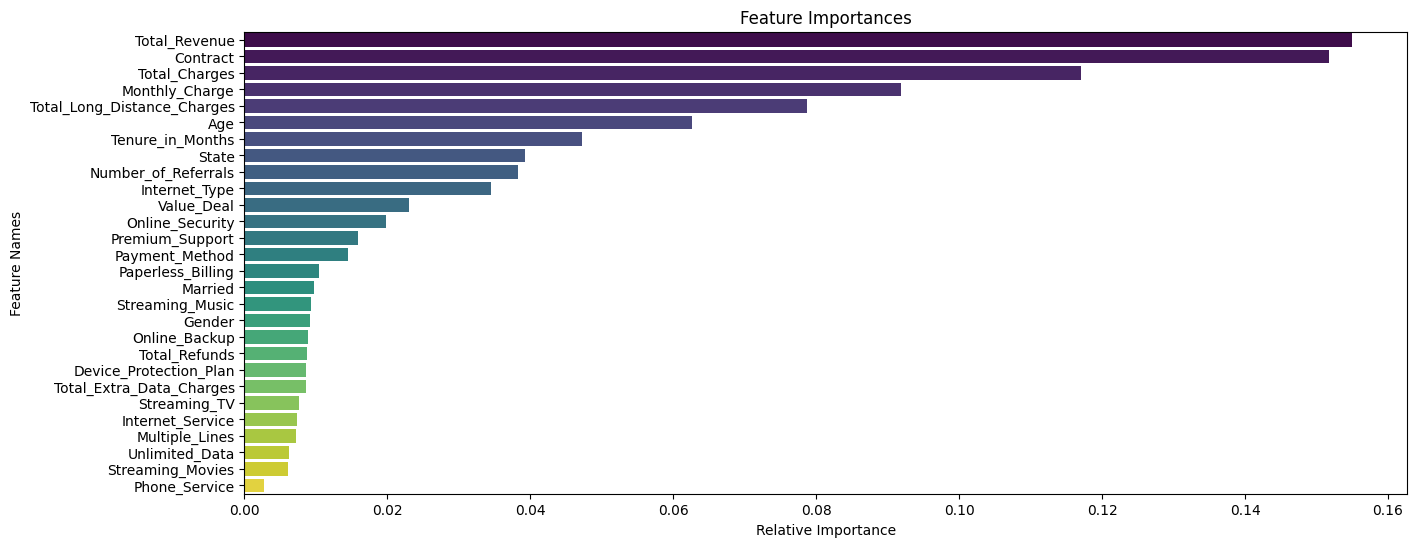

In [11]:
# Ignore warnings

import warnings
warnings.filterwarnings("ignore")

# Ploting the feature importances

plt.figure(figsize=(15, 6))
colors = plt.cm.viridis(np.linspace(0, 1, len(indices))) # Generate an array of colors
sns.barplot(x=importances[indices], y=X.columns[indices], palette=colors) # Use palette to assign colors to bars
plt.title('Feature Importances')
plt.xlabel('Relative Importance')
plt.ylabel('Feature Names')
plt.show()

***Use this Model for Prediction on the New Data***

In [12]:
# Definining the path to the Excel file
file_path = r"/content/Predictions_Data.xlsx"

# Defining  the sheet name to read data from
sheet_name = 'vw_JoinData'

# Reading  the data from the specified sheet into a pandas DataFramedata
new_data = pd.read_excel(file_path, sheet_name=sheet_name)
new_data

,Customer_ID,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Phone_Service,Multiple_Lines,...,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status,Churn_Category,Churn_Reason
0,11751-TAM,Female,18,No,Tamil Nadu,5,7,Deal 5,No,No,...,Mailed Check,24.299999,38.450001,0.0,0,0.000000,38.450001,Joined,Others,Others
1,12056-WES,Male,27,No,West Bengal,2,20,NaN,Yes,No,...,Bank Withdrawal,90.400002,268.450012,0.0,0,94.440002,362.890015,Joined,Others,Others
2,12136-RAJ,Female,25,Yes,Rajasthan,2,35,NaN,Yes,No,...,Bank Withdrawal,19.900000,19.900000,0.0,0,11.830000,31.730000,Joined,Others,Others
3,12257-ASS,Female,39,No,Assam,9,1,NaN,Yes,No,...,Credit Card,19.549999,19.549999,0.0,0,10.200000,29.750000,Joined,Others,Others
4,12340-DEL,Female,51,Yes,Delhi,0,10,NaN,Yes,No,...,Credit Card,62.799999,62.799999,0.0,0,42.189999,104.989998,Joined,Others,Others
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406,99488-KAR,Male,50,Yes,Karnataka,10,31,NaN,No,No,...,Credit Card,24.400000,24.400000,0.0,0,0.000000,24.400000,Joined,Others,Others
407,99515-ASS,Male,34,No,Assam,11,11,NaN,Yes,Yes,...,Credit Card,65.250000,209.899994,0.0,0,128.039993,337.940002,Joined,Others,Others
408,99855-MAH,Female,50,Yes,Maharashtra,5,29,NaN,Yes,No,...,Bank Withdrawal,69.699997,135.199997,0.0,0,31.340000,166.539993,Joined,Others,Others
409,99862-BIH,Female,30,No,Bihar,12,9,Deal 5,Yes,No,...,Bank Withdrawal,74.000000,74.000000,0.0,0,23.700001,97.699997,Joined,Others,Others


In [13]:
# Retaining the original DataFrame to preserve unencoded columns

original_data = new_data.copy()

# Retaining the Customer_ID column

customer_ids = new_data['Customer_ID']

# Droping  columns that won't be used for prediction in the encoded DataFrame

new_data = new_data.drop(['Customer_ID', 'Customer_Status', 'Churn_Category', 'Churn_Reason'], axis=1)

In [14]:
# Encode categorical variables using the saved label encoders

for column in new_data.select_dtypes(include=['object']).columns:

    new_data[column] = label_encoders[column].transform(new_data[column])

In [15]:
# Making predictions

new_predictions = rf_model.predict(new_data)

# Adding predictions to the original DataFrame

original_data['Customer_Status_Predicted'] = new_predictions

In [16]:
# Filter ingthe DataFrame to include only records predicted as "Churned ( 1 means Churned)"

original_data = original_data[original_data['Customer_Status_Predicted'] == 1]

In [17]:
# Saving the results

original_data.to_csv("Predictions.csv", index=False)